In [29]:

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn import metrics
from sklearn.datasets import make_moons
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Random Forests

In [30]:
X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

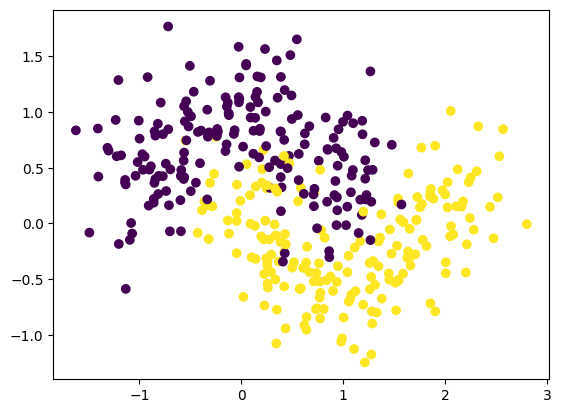

In [31]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

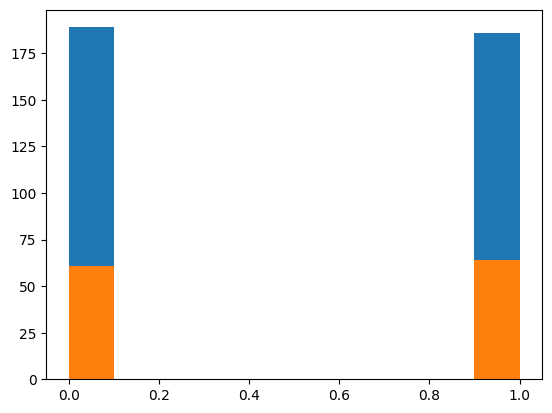

In [32]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

# Zad. 

Porównaj działanie

```python
BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
```

i

```python
RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

In [21]:
bagg_clf = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)
bagg_clf.fit(X_train, y_train)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [22]:
def score_model(model):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    return accuracy

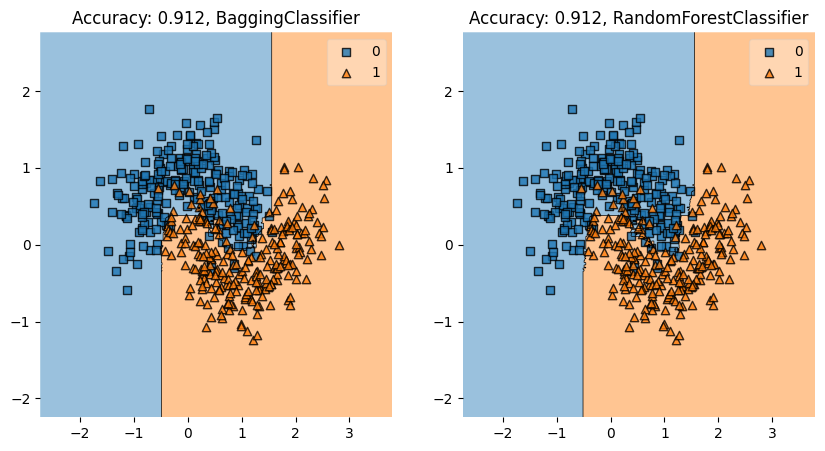

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for ax, model in zip(axs, [bagg_clf, rnd_clf]):
    plot_decision_regions(X, y, model, ax=ax)
    ax.set_title(f"Accuracy: {score_model(model)}, {model.__class__.__name__}")

# Ciekawostka - Extra-Trees 


* Gdy budujemy kolejne drzewa  w losowym lesie, w każdym węźle rozpatrywany jest losowy podzbiór elementów do podziału. 

* Możliwe jest stworzenie drzewa jeszcze bardziej losowego, wykorzystując losowe podziały dla każdej cechy, zamiast szukać najlepszych możliwych podziału (jak w przypadku zwykłych drzew decyzyjnych).

* Taki las losowy nazywa się **Extremely Randomized Trees** (lub **Extra-Trees** w skrócie). 

* Możesz utworzyć klasyfikator **Extremely Randomized Trees** za pomocą klasy **ExtraTreesClassifier** z Scikit-Learn. 

* Jego API jest identyczne z klasą RandomForestClassifier. 


# Zad.

Naucz 

```python
ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
```

i porównaj z powyższymi.

In [27]:
extra_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
extra_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                     random_state=42)

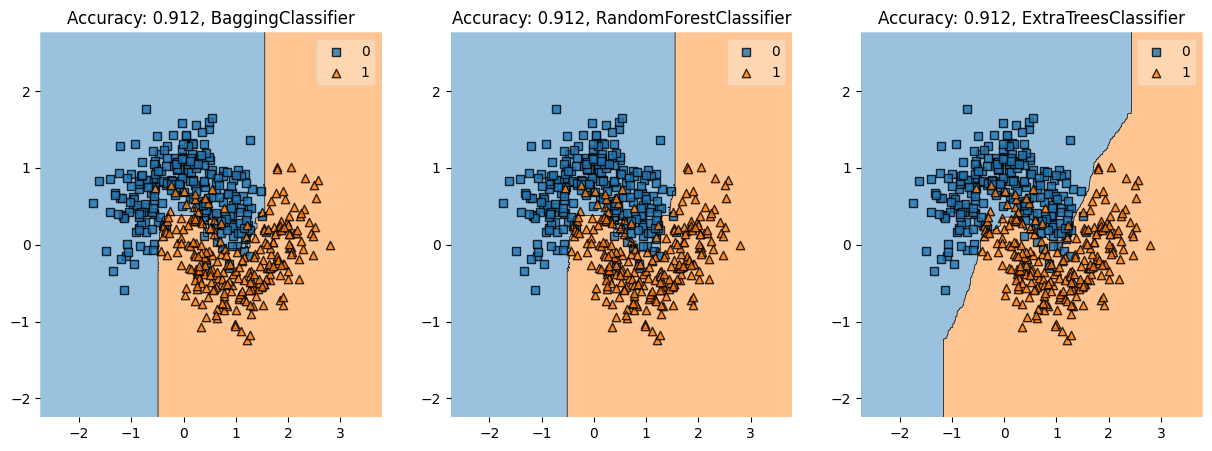

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, model in zip(axs, [bagg_clf, rnd_clf, extra_clf]):
    plot_decision_regions(X, y, model, ax=ax)
    ax.set_title(f"Accuracy: {score_model(model)}, {model.__class__.__name__}")